# <p style="text-align: center;">  Error Propagation </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

In [2]:
# Constants and errors for RCL
R = 99.8        #ohms 
Rsig = 0.2      #ohms

Rl = 103.4      #ohms 
Rlsig = 0.2     #ohms

L = 15E-3       #H 
Lsig = 1E-3     #H

C = (10.08)*10**(-9)    #Farads 
Csig = .05E-9           #Farada
# change 

In [3]:
# Constants for Diode circuit 
R2 = 3300        #ohms 
R2sig = 10       #ohms

# 1. Calculate $R_T$ and its error prop
- <span style="color:red"> **Calculation in Excel**</span>


$$
R_T = R + R_L
$$

> $$\sigma_{R_T}^2 = \left(\frac{\partial R_T}{\partial R} \right)^2 \cdot \sigma_{R}^2 + \left(\frac{\partial R_T}{\partial R_L} \right)^2 \cdot \sigma_{R_L}^2$$

> $$\sigma_{R_T}^2 = \left( 1 \right)^2 \sigma_{R}^2 + \left( 1 \right)^2 \sigma_{R_L}^2$$

$$
\sigma_{R_T}^2 = \sigma_{R}^2 +  \sigma_{R_L}^2
$$

In [4]:
def R_tVar(Rsig, RLsig):
    RtVar = Rsig**2 + RLsig**2 
    return RtVar

In [5]:
Rt = R + Rl
Rtvar = R_tVar(Rsig, Rlsig)

# 2. Calculate Theoretical resonant frequency $\omega_0$ and its error prop
>> This is from known characteristics (ideal)
- <span style="color:red"> **Requires code due to complextity** </span>

$$
w_0 = \frac{1}{\sqrt{LC}}
$$

> $$\sigma_{\omega_0}^2 = \left(\frac{\partial \omega_0}{\partial L} \right)^2 \cdot \sigma_{L}^2 + \left(\frac{\partial \omega_0}{\partial C} \right)^2 \cdot \sigma_{C}^2$$

> $$\sigma_{\omega_0}^2 = \left(\frac{-1}{2\cdot L^{\frac{3}{2}}\cdot C^{\frac{1}{2}}} \right)^2 \cdot \sigma_{L}^2 + \left(\frac{-1}{2\cdot L^{\frac{1}{2}}\cdot C^{\frac{3}{2}}}\right)^2 \cdot \sigma_{C}^2$$

 $$\sigma_{\omega_0}^2 = \left(\frac{1}{2\cdot L^{\frac{3}{2}}\cdot C^{\frac{1}{2}}} \right)^2 \cdot \sigma_{L}^2 + \left(\frac{1}{2\cdot L^{\frac{1}{2}}\cdot C^{\frac{3}{2}}}\right)^2 \cdot \sigma_{C}^2$$

In [6]:
def Omega0(L,C): 
    """ Input LC in standard units 
        Return resonant angular frequency"""
    w0 = 1/np.sqrt(L*C)
    return w0 

def Freq0(w0): 
    """ Input omega0
        Return frequecny0"""
    f0 =w0/(2*np.pi)
    return f0 

def OmegaVar(L,Lsig, C, Csig): 
    """ Input L,Lsig,C,Csig in standard units 
        Return omega0 Variance"""
    Lvar = Lsig**2
    Cvar = Csig**2
    
    t1 = 2*(L**(3/2))*np.sqrt(C)
    t2 = 1/t1
    term1 = (t2**2)*Lvar
    
    t3 = 2*np.sqrt(L)*(C**(3/2))
    t4 = 1/t3
    term2 = (t4**2)*Cvar

    w0var = term1 + term2

    return w0var

In [7]:
w0 = Omega0(L,C)
w0var = OmegaVar(L, Lsig, C, Csig)
w0sig = np.sqrt(w0var)
f0 = Freq0(w0)
f0sig = w0sig/(2*np.pi)

# 3. Calculate the phase $\phi$ and its error

- td = Time difference measured by oscilloscope 
- <span style="color:red">**Calculation in Excel**</span>


$$
\phi = 360 \cdot \frac{td}{P} = deg
$$

$$
\phi = 2\pi \cdot \frac{td}{P} = rad
$$

> $$\sigma_\phi^2 = \left(\frac{\partial \phi}{\partial td} \right)^2 \cdot \sigma_{td}^2 + \left(\frac{\partial \phi}{\partial P} \right)^2 \cdot \sigma_{P}^2$$

 $$ 
 \sigma_\phi^2 = \left(360 \cdot \frac{1}{P}\right)^2 \cdot \sigma_{td}^2 + \left(360 \frac{td}{P^2} \right)^2\cdot \sigma_{P}^2
 $$

In [8]:
def Phasedeg(timediff, period): 
    """ Input time difference between waves & period of output wave
        Return the phase angle in degrees"""
    phi = 360*(timediff/period)
    return phi


def PhaseVardeg(timediff, tdsig, period, psig): 
    """ Input the time differnce, tdsig, period, psig 
        Returns the Variance of the phase angle in degress"""
    tdvar = tdsig**2
    pvar = psig**2

    t1 = 360/period
    term1 = (t1**2)*tdvar
    
    t2 = (360*timediff)/(period**2)
    term2 = (t2**2)*pvar

    phivar = term1 + term2
    return phivar

# Functions 
$$
i(t) =  \frac{V_0 \omega \cdot \sin(\omega t -\phi)}{L \sqrt{(\omega_0^2 -\omega^2)^2 +\omega^2 \Gamma^2}}
$$

> Voltage $v(t)$
$$
v_R(t) = R\cdot i(t) = R\cdot \left( \frac{V_0 \omega \cdot \sin(\omega t -\phi) }{L\sqrt{(\omega_0^2-\omega^2)^2 +\omega^2\Gamma^2}}\right )
$$

# 4. Amplitude Values 
$$
\Gamma = \frac{R_T}{L}
$$

$$
\omega_0 =\frac{1}{\sqrt{LC}}
$$
> Current $i(t)$

$$
I_{Max} = \frac{V_0 \omega}{L \sqrt{(\omega_0^2 -\omega^2)^2 +\omega^2 \Gamma^2}}
$$

> Voltage $v(t)$
$$
v_R(t)_{Max} = R\cdot \left(\frac{V_0 \omega }{L\sqrt{(\omega_0^2-\omega^2)^2 +\omega^2\Gamma^2}}\right)
$$

> At res $\omega_0 =\omega$
>> $$
v_R(t) = R\cdot i(t) = V_0 \frac{R}{R_T}\cdot \sin(\omega t)
$$
$$
v_R(\omega) = R\cdot i(\omega) = R\cdot \frac{V_0}{R_T}
$$

In [9]:
Gamma = Rt/L

In [10]:
#General, used for easy calculation 
def IMax(V0,w,w0,Gamma,L):
    """ Input Input Voltage, omega, omega0, L, Gamma
        Return I max in Amps"""
    t1 = V0*w

    t2 = w0**2 - w**2
    t3 = (w*Gamma)**2
    t4 = L*np.sqrt(t2**2 +t3)

    imax =t1/t4

def vRMax(V0,w,w0,Gamma,L,R): 
    """ Input Input Voltage, omega, omega0, L, Gamma, R
        Return v_R max in volts"""
    t1 = V0*w*R

    t2 = w0**2 - w**2
    t3 = (w*Gamma)**2
    t4 = L*np.sqrt(t2**2 +t3)

    vRmax = t1/t4

In [11]:
RCLdata = pd.read_csv('data3.csv')

In [12]:
# Create some series 
Vin = RCLdata['VIn CH1']
Vout = RCLdata['VOut CH2']
Freq = RCLdata['Frequency Hz']
Period = RCLdata['Period s']
Periodsig = RCLdata['PeriodSig s']
Timdiff = RCLdata['Timediff TD s']
Timdiffsig = RCLdata['TDSig s']
Phi = RCLdata['Phase Ch2Ch1 deg']
Phivar = RCLdata['PhaseVar deg']
w = RCLdata['w']
wSig =RCLdata['wSig']

In [13]:
#check excel calculated correctly 
phi2 = Phasedeg(Timdiff,Period)
phi2var = PhaseVardeg(Timdiff,Timdiffsig, Period, Periodsig)

Text(0.5, 0, 'Frequency (Hz)')

<Figure size 432x288 with 0 Axes>

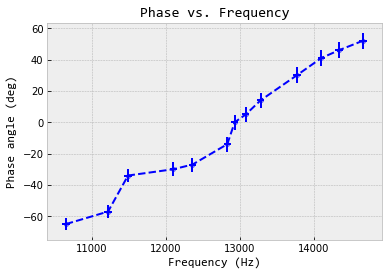

In [14]:
# plot  phi vs f

#style
hfont = {'fontname':'Consolas'}

plt.figure()
plt.style.use('bmh')
RCLdata.plot.scatter(x ='Frequency Hz', y = 'Phase Ch2Ch1 deg', alpha =0.5 )

phistd = np.sqrt(Phivar)
plt.errorbar(RCLdata['Frequency Hz'],RCLdata['Phase Ch2Ch1 deg'], yerr=phistd ,xerr=RCLdata['FeqSig Hz'], fmt= '--b'  )

#Labels 
plt.title("Phase vs. Frequency", **hfont)
plt.ylabel("Phase angle (deg)", **hfont)
plt.xlabel("Frequency (Hz)", **hfont)


# plt.savefig("hello3.png", bbox_inches='tight')

Vertical bars are soo small they do not appear.


<Figure size 576x432 with 0 Axes>

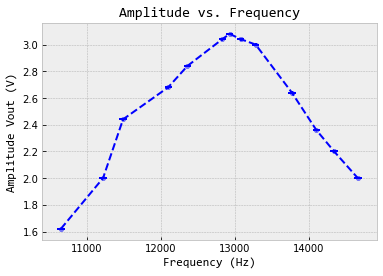

In [15]:
# plot Vout vs f

#style
hfont = {'fontname':'Consolas'}

plt.figure(figsize=(8,6))
plt.style.use('bmh')
RCLdata.plot.scatter(x ='Frequency Hz', y = 'VOut CH2', alpha =0.5 )

phistd = np.sqrt(Phivar)
plt.errorbar(RCLdata['Frequency Hz'],RCLdata['VOut CH2'], yerr=RCLdata['VOutSig'] ,xerr=RCLdata['FeqSig Hz'], fmt= '--b'  )

#Labels 
plt.title("Amplitude vs. Frequency", **hfont)
plt.ylabel("Amplitude Vout (V)", **hfont)
plt.xlabel("Frequency (Hz)", **hfont)


# plt.savefig("hello3.png", bbox_inches='tight')

print("Vertical bars are soo small they do not appear.")

Vertical bars are soo small they do not appear.


<Figure size 576x432 with 0 Axes>

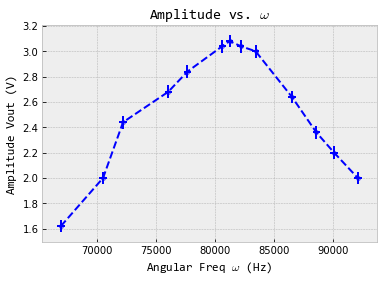

In [24]:
# plot Vout vs f

#style
hfont = {'fontname':'Consolas'}

plt.figure(figsize=(8,6))
plt.style.use('bmh')
RCLdata.plot.scatter(x ='w', y = 'VOut CH2', alpha =0.5 )

phistd = np.sqrt(Phivar)
plt.errorbar(RCLdata['w'],RCLdata['VOut CH2'], yerr=RCLdata['VOutSig']*5 ,xerr=RCLdata['wSig'], fmt= '--b'  )

#Labels 
plt.title("Amplitude vs. $\omega$", **hfont)
plt.ylabel("Amplitude Vout (V)", **hfont)
plt.xlabel("Angular Freq $\omega$ (Hz)", **hfont)


# plt.savefig("hello3.png", bbox_inches='tight')

print("Vertical bars are soo small they do not appear.")

$$
v_R(t)_{Max} = R\cdot \left(\frac{V_0 \omega }{L\sqrt{((\frac{1}{\sqrt{LC}})^2-\omega^2)^2 +\omega^2(\frac{R_T}{L})^2}}\right)
$$

In [17]:
# funciton to parameterize 
def VRMax(w,V0,Rl,L,C,R):
    return R*(V0*w/L)*( (1/(L*C)-w**2)**2 + w**2*((R+Rl)/L)**2)**(-1/2)

In [18]:
# funciton to parameterize 
def VRMax2(w,V0,gamma,w0,R,L):
    return R*(V0*w/L)*( (w0**2-w**2)**2 + w**2*(gamma)**2)**(-1/2)

In [19]:
print(L)

0.015


v0 = 2.1660020486986142 +/- 2212937.8052035947
Gamma = 19213.908594699275 +/- 980.8964961454838
w0 = 80539.10378999433 +/- 317.2244295693986
R = 124.42213097722649 +/- 134217728.0
L = 0.004584772989945847 +/- 4500.2389388963875


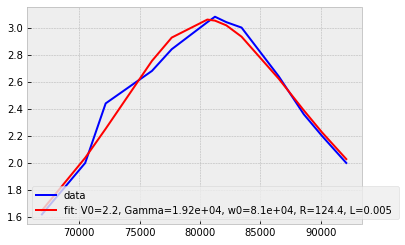

In [26]:
popt1 , pcov1 = curve_fit( VRMax2,w, Vout , sigma=RCLdata['VOutSig']*10, p0 =[3,226893,81325,100,0.015],absolute_sigma=True)


plt.plot(w,Vout, 'b-',  label='data')
plt.plot(w, VRMax2(w, *popt1), 'r-', label='fit: V0=%.1f, Gamma=%5.2e, w0=%.1e, R=%.1f, L=%.3f ' % tuple(popt1))

plt.legend()

print(f'v0 = {popt1[0]} +/- {pcov1[0,0]**0.5}')
print(f'Gamma = {popt1[1]} +/- {pcov1[1,1]**0.5}')
print(f'w0 = {popt1[2]} +/- {pcov1[2,2]**0.5}')
print(f'R = {popt1[3]} +/- {np.abs(pcov1[3,3])**0.5}')
print(f'L = {popt1[4]} +/- {np.abs(pcov1[4,4])**0.5}')


v0 = 3.694295043176864 +/- 1065387.2938646579
RL = 46.85678434646116 +/- 72342946.01508912
L = 0.014188038366878025 +/- 2630.5101248303713
C = 1.086585879486817e-08 +/- 0.0020142528280816443
R = 225.75085078791915 +/- 39244464.05034651


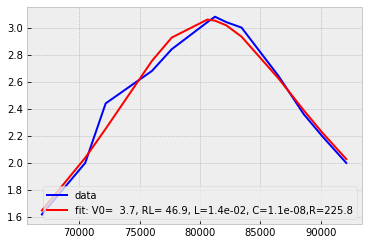

In [21]:
popt , pcov = curve_fit( VRMax,w, Vout, p0=[3,103,15E-3,10E-9,98] )
plt.plot(w,Vout, 'b-',  label='data')
plt.plot(w, VRMax(w, *popt), 'r-', label='fit: V0=%5.1f, RL=%5.1f, L=%.1e, C=%.1e,R=%5.1f' % tuple(popt))

plt.legend()

print(f'v0 = {popt[0]} +/- {pcov[0,0]**0.5}')
print(f'RL = {popt[1]} +/- {pcov[1,1]**0.5}')
print(f'L = {popt[2]} +/- {pcov[2,2]**0.5}')
print(f'C = {popt[3]} +/- {pcov[3,3]**0.5}')
print(f'R = {popt[4]} +/- {pcov[4,4]**0.5}')



$$
\tan(\phi) = \frac{\omega^2 - \omega_0^2}{\omega \Gamma}
$$

$$
\phi = \tan^{-1}\left({\frac{\omega^2 - \frac{1}{LC}}{\omega \cdot \frac{R_T}{L}}}\right)
$$

In [22]:
def phifunc(w,L,C,RL,R):
    return np.arctan((w**2 -(1/L*C))/(w*(R+RL)/L))*(180/np.pi)

c:\Users\mpmun\134-mainfolder\134-Lab-Spring-2023\Code\.venv\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[7.53235522e-04 1.00000000e-08 4.31007711e+03 4.60541262e+03]


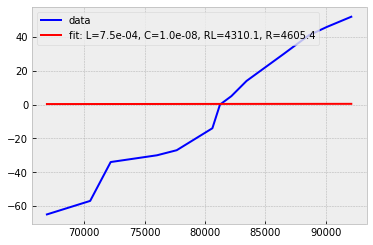

In [23]:
popt , pcov = curve_fit( phifunc,w, Phi, p0=[15E-3,10E-9,100,97] )
plt.plot(w,Phi, 'b-',  label='data')
plt.plot(w, phifunc(w, *popt), 'r-', label='fit: L=%5.1e, C=%5.1e, RL=%.1f, R=%5.1f' % tuple(popt))

plt.legend()

print(popt)